In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [5]:
# Carregar arquivo para um dataframe
df_exames = pd.read_csv("./datasets/exame_diabetes.csv")

In [6]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [8]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [9]:
# Transformação de features
df_exames["genero"].unique

<bound method Series.unique of 0     M
1     F
2     M
3     F
4     M
     ..
95    F
96    F
97    M
98    M
99    F
Name: genero, Length: 100, dtype: object>

In [ ]:
# Remoção da coluna id_paciente
df_exames.drop(columns=["id_paciente"], axis=1, inplace=True)

In [10]:
# Converter uma variável categórica(genero)  em numérica, usando one-hot enconding
df_exames = pd.get_dummies(df_exames, columns=["genero"], dtype="int64")

In [11]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id_paciente  100 non-null    int64
 1   idade        100 non-null    int64
 2   peso         100 non-null    int64
 3   altura       100 non-null    int64
 4   resultado    100 non-null    int64
 5   genero_F     100 non-null    int64
 6   genero_M     100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB


<Axes: >

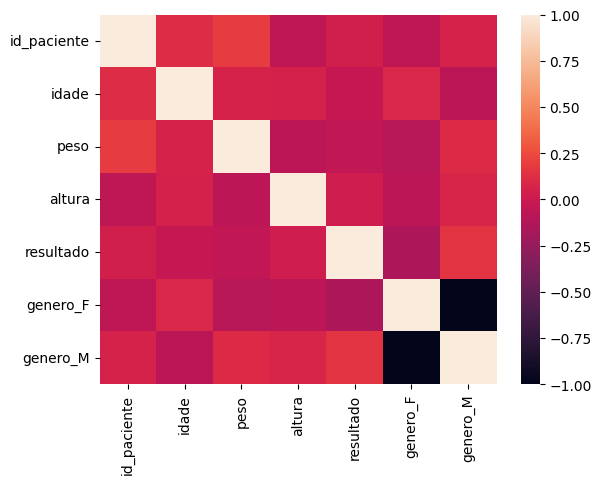

In [12]:
# Visualização dos dados
# Apresentar mapa de calor com correlação entre variáveis
sns.heatmap(df_exames.corr())

<Axes: >

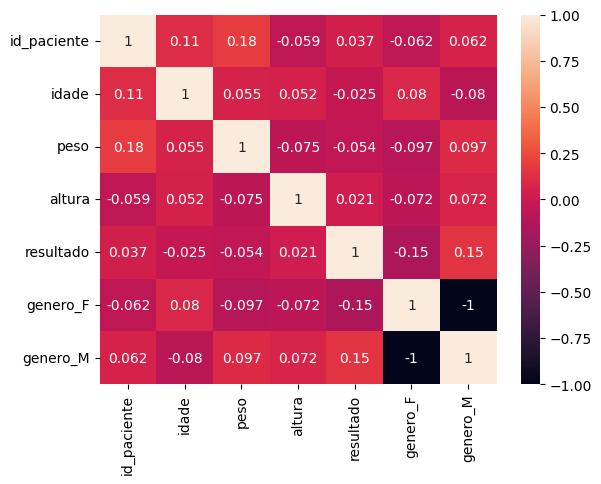

In [13]:
# Visualização dos dados
# Apresentar mapa de calor com correlação entre variáveis - melhorado: valores dentro da matriz e intervalo pré-definido
sns.heatmap(df_exames.corr(), annot=True, vmin=-1, vmax=1)

<Axes: >

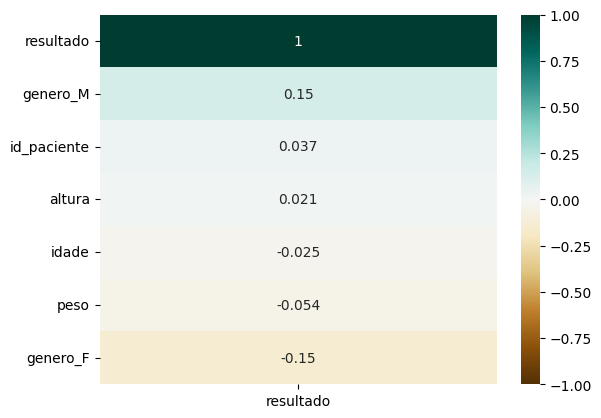

In [16]:
# Calcular a correlação e ordenar os valores
correlation = df_exames.corr()[["resultado"]].sort_values(by="resultado", ascending=False)

# Criar o heatmap
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="BrBG")

array([[<Axes: xlabel='id_paciente', ylabel='id_paciente'>,
        <Axes: xlabel='idade', ylabel='id_paciente'>,
        <Axes: xlabel='peso', ylabel='id_paciente'>,
        <Axes: xlabel='altura', ylabel='id_paciente'>,
        <Axes: xlabel='resultado', ylabel='id_paciente'>,
        <Axes: xlabel='genero_F', ylabel='id_paciente'>,
        <Axes: xlabel='genero_M', ylabel='id_paciente'>],
       [<Axes: xlabel='id_paciente', ylabel='idade'>,
        <Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='id_paciente', ylabel='peso'>,
        <Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
       

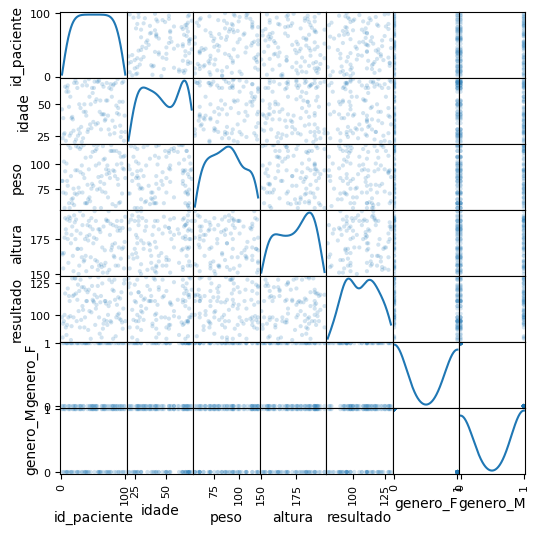

In [18]:
# Plot de Scatter - Dispersão com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

In [24]:
# Histograma de todas as variáveis

num_vars = df_exames.shape[1]

# Calcule as linhas e colunas necessárias para comportar todas as variáveis
cols = 3
rows = (num_vars // cols) + (num_vars % cols > 0)

# Criar histogramas para todas as variáveis
df_exames.hist(layout=(rows, cols), figsize=(15, 10))

ValueError: Layout of 2x3 must be larger than required size 7

<Figure size 1500x1000 with 0 Axes>